# Decison Trees

- The objective in building this predictive decision tree model is to predict the characteristics of a customer who is likely to buy a car based on previous purchase history

- The variables that will be used to teach the decision tree model are Gender, Age, and Salary

- The challenge for a car dealership is to target their sales and marketing resources at in the best possible way. I.e., to spend time on a category of customer who is more likely to buy a car

- This algorithm will help to solve that problem for the car dealership based on a dataset of 1,000 previous purchases

- The decision tree will classify likely customers in a binary way, 1 means they are predicted to purchase a car and 0 means that they are predicted to not purchase a car



In [2]:
import numpy as np                              #Numpy for working with arrays
import pandas as pd                             #Pandas for working with data sets
from sklearn import tree                        #The decision tree inport comes from sklearn - used for modelling and predictive analytics
import io                                       #Needed for the file upload function and is used for file related reading and writing options

from google.colab import files                  #Needed to import a file that is stored on the local drive
uploaded = files.upload()
car_df = pd.read_csv(io.BytesIO(uploaded['car_data.csv']), header = 0) #The io.BytesIO optimises the dataset to work faster as it is now stored in RAM. Also it enables the uploaded file which is stored in a variable to be used as a file object

Saving car_data.csv to car_data.csv


In [46]:
print("Dataframe shape: " + str(car_df.shape) + "\n")                                 # Shows the size of the dataframe - in this case, 1000 rows and 5 columns
car_df.describe()                                                                     # Shows some useful stats to visualise the data

Dataframe shape: (1000, 5)



,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.484000,40.106000,72689.000000,0.402000
std,288.819436,0.499994,10.707073,34488.341867,0.490547
min,1.000000,0.000000,18.000000,15000.000000,0.000000
25%,250.750000,0.000000,32.000000,46375.000000,0.000000
50%,500.500000,0.000000,40.000000,72000.000000,0.000000
75%,750.250000,1.000000,48.000000,90000.000000,1.000000
max,1000.000000,1.000000,63.000000,152500.000000,1.000000


In [3]:
car_df.head(5)            # Display the first five lines of the dataset to ensure the upload worked correctly and to check content

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


- To work, the decision tree needs all data to be shown in numerical format. We need to map the feature "Gender" to numerical values. 1 is used for male and 0 for female

In [4]:
gender = {'Male': 1, 'Female': 0}                         # Gender variable is declared as a dictionary with "Male" assigned the value 1 and "Female" assigned the value 0
car_df['Gender'] = car_df['Gender'].map(gender)           # The current values of the "Gender" feature are now mapped to the above dictionary values. 1 instead of "Male" and 0 for "Female"

car_df.head()                                             # Display a sample of 5 rows of the data again to see if the above worked correctly

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


- Below we need to separate out all of the x values for the decision tree. 
- The x values will be the independant variables and are "Gender", "Age" and "Annual Salary". 
- Obviously the feature "User ID" will not be included as this will have no bearing on the outcome of the dependant variable y and is just used as a unique identifier for the data set.

In [6]:
features = list(car_df.columns[1:4])    # The "features" variable is assigned the columns Gender, Age and AnnualSalary. The count starts at 0 which is why 1=Gender and not "User ID"
features                                # Returns the below list which confirms we have the correct variables to continue

['Gender', 'Age', 'AnnualSalary']

- The y variable is assigned to the feature "Purchased". This is what we want to predict
- The x variable is assigned the features, "Gender", "Age", and "Annual Salary"
- The decision tree classifier is instantiated and assigned to the variable "model" and the max depth of the tree is set to 4
- The data is then split into training data and test data (80/20 split)
- The x training features and y training feature and now fit together




In [63]:
from sklearn.model_selection import train_test_split # used to split the data into training and testing
from sklearn.metrics import accuracy_score           # used to check the accuracy of the model on the test data
from sklearn.metrics import mean_squared_error as MSE

y = car_df["Purchased"]                               # The y variable is assinged the values of the "Purchased" feature    
X = car_df[features]                                  # The x variable is assinged the values of the "Gender", "Age", and "AnnualSalary" features 
model = tree.DecisionTreeClassifier(max_depth=4)       # Decision tree classifier declared and assigned to model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # This code splits the data into training data (80%) for training the model, and testing data (20%) for testing accuracy after training

model = model.fit(X_train, y_train)                                    # The x features are now fitted to the y variable target, and are the values assinged to model

y_predicted = model.predict(X_test)                                    # The y_predicted value is the label output of the x input. The x input value is not part of the training data in order to ensure test accuracy of the tree, so as to prevent memorisation of results 
accuracy = accuracy_score(y_test, y_predicted)*100

print("The accuracy score is: " + str(accuracy) + "%")                # This scores predicts how often a correct prediction is made




The accuracy score is: 88.0%


... and display it. Note you need to have pyplot2 installed for this to work.

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

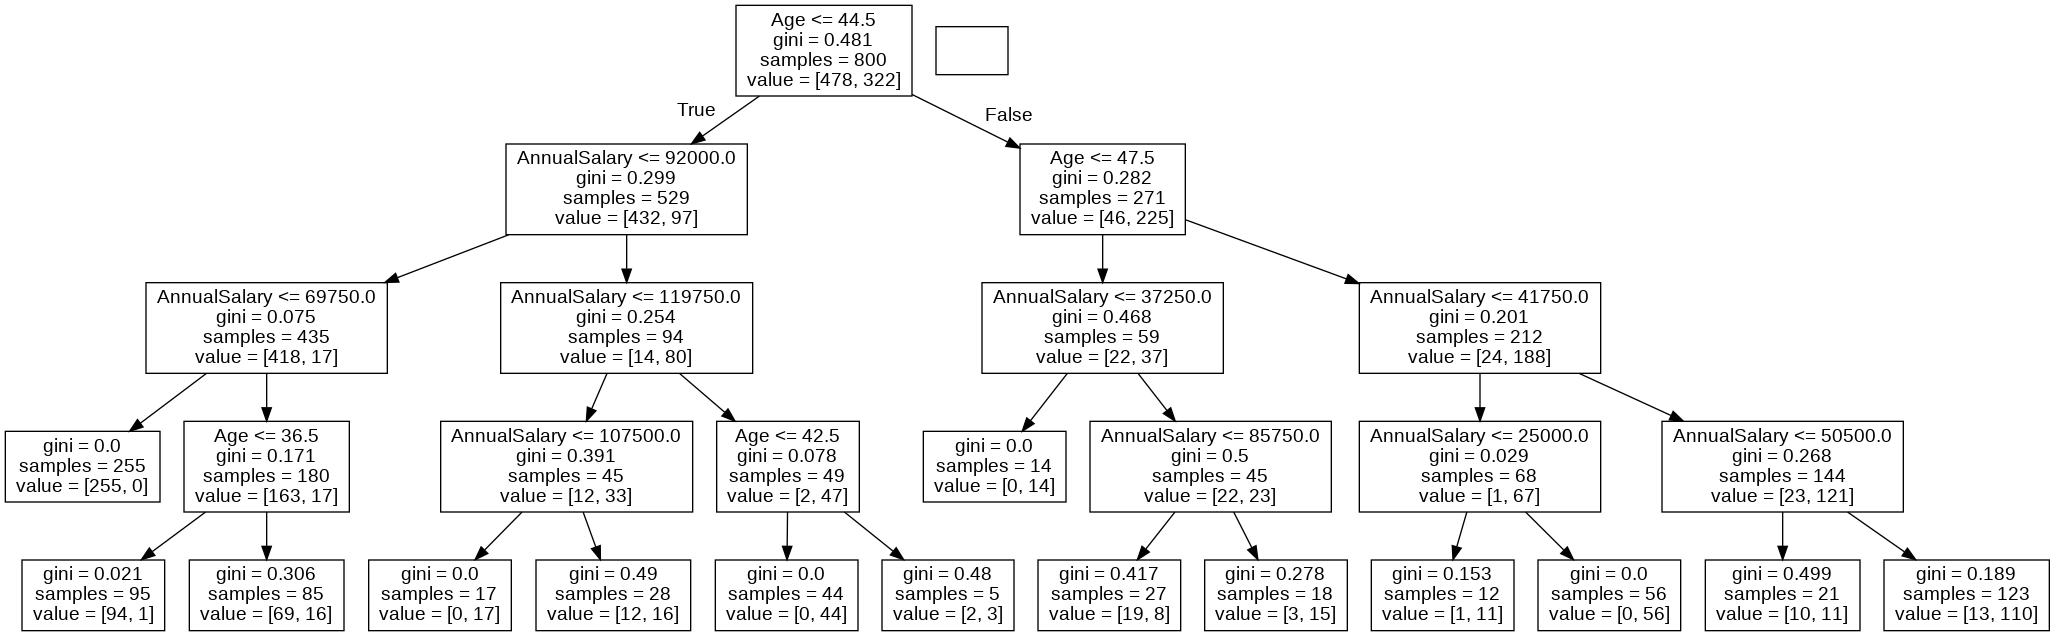

In [49]:
from IPython.display import Image  
from six import StringIO
import pydot

dot_data = StringIO()  

tree.export_graphviz(model, out_file=dot_data, feature_names=features)   # From sklearn library - used to export a decision tree graph in dot format. The parameters are as follows: 1) The decision tree. 2) Name of the output file, i.e., "dot_data". 3) Names of each feature.
                                                                       # Returns a string representation of the input tree in GraphViz dot format   
                                                                      
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())  

## Ensemble learning: using a random forest

We'll use a random forest of 1000 decision trees to predict employment of specific candidate profiles:

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10000)
model = model.fit(X_test, y_test)
print(model.predict([[1, 35, 65000]]))
print(model.predict([[0, 100, 107500]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[1]


## Activity